## Modules

For this experiment, Python will be used with the following modules:
* Matplotlib
	+ For visualization of the algorithm results performance
* Numpy & Random
    + For the generation of random values
* Os
    + To select the workspace path where the problem instance library is located

In [24]:
import matplotlib.pyplot as plt
import random
import numpy
import os

## Localizes the Knapsack Instances Library

In [25]:
os.chdir(r"C:\Users\xedua\OneDrive\Escritorio\MCC-I\Semester_2\Research\KP instances")

## Generator/Selector of PIs

Description of the **_«instances»_** function:

* The purpose of this function is to either return a tuple with problem instance objects (inside tuples) from the library with its knapsack limit, or to generate a random problem instance with objects of weight ∈ (1, 15) and value ∈ (1, 1/3 * knapsack limit)

* **_Parameters_**

    + number_objects: _Integer_
        - The amount of available objects that will contain the problem instance 
    + k_limit: _Integer_
        - The maximum units that a knapsack solution can contain
* **_Returns_**
    + PI: _List of tuples with integers_
        - Either the generated or the library selected problem instance, each object is a tuple of (profit, weight)
    + k_limit: _Integer_
        - Either the originally specified knapsack limit or the knapsack limit selected from the problem instance library

In [26]:
# Generator/Selector of PIs
def instances(number_objects, k_limit):
    if k_limit != 0: # When knapsack limit is defined, instances are generated
        PI = []
        for element in range(number_objects):
            PI.append((random.randint(1.0, 15.0), random.randint(1, k_limit//3))
            ) # Objects ∈ [value (1, 15), weight (1, 1/3kp)]
        return PI, k_limit
    else: # When knapsack limit undefined, an instance from the library is used
        fileName = "ks_" + str(number_objects) + "_0" # Introduces the number of
        # objects into the filename that will be requested from the library
        f = open(fileName, "r") # Opening, reading, and cleaning the instance
        lines = f.readlines()
        line = lines[0].split(",")
        nbItems = int(line[0].strip())
        k_limit = int(line[1].strip())
        PI = [None] * nbItems
        for i in range(0, nbItems):
            line = lines[i + 1].split(",")
            weight = int(line[0].strip())
            profit = float(line[1].strip())
            PI[i] = (profit, weight) # Saves objects as (profit, weight)
        return PI, k_limit # Returns the instance and the knapsack limit 

## Random Solution Generator

Description of the **_«solver»_** function:

* The purpose of this function is to return a list with a solution for a problem instance, with randomly selected objects

* **_Parameters_**

    + PI: _List of tuples with integers_
        - The either generated or selected problem instance from the **_«instances»_** function
* **_Returns_**
    
    + _List of integers_
        - A random list with numbers ∈ (0, 1) ∨ (Outside Knapsack, Inside Knapsack)
            - Each number makes reference to each object from the problem instance

In [27]:
# Random Solution Generator
def solver(PI):
    number_objects = len(PI)
    return numpy.random.randint(0, 2, number_objects) # Returns the random 
    # generated binary-numbers

## Evaluator of Solutions

Description of the **_«evaluator»_** function
* The purpose of this function is to evaluate the performance of the solution, it returns a tuple with the (total profit, total weight, state of the knapsack).

* **_Parameters_**
    + PI: _List of tuples with integers_
        - The either generated or selected problem instance from the **_«instances»_** function
    + Solution: _List of integers_
        - A random list with numbers ∈ (0, 1) ∨ (Outside Knapsack, Inside Knapsack) from the **_«solver»_** function
            - Each number makes reference to each object from the problem instance
    + k_limit: _Integer_
        - Either the originally specified knapsack limit or the knapsack limit selected from the problem instance library, from the **_«instances»_** function
* **_Returns_**
    + s1: _Tuple with integers_
        - A tuple with the total profit, total weight, and the state of the knapsack which may be 0 or 1
        

In [28]:
# Evaluator of Solutions
def evaluator(PI, solution, k_limit):
    s1 = (0, 0, 0)
    for i in range(len(PI)): # Iterates all the objects in the problem instance
        if solution[i] == 1: # When the object is in the knapsack considers the 
            # object in the evaluation
            s1 = (s1[0] + PI[i][0], s1[1] + PI[i][1]) # Sums up the profit and 
            # the weight of all the items
    if s1[1] <= k_limit: # When the knapsack is not broken saves a record of 0
        s1 = (s1[0], s1[1], 0)
    else:
        s1 = (s1[0], s1[1], 1) # When the knapsack is broken saves a record of 1
    return s1

## Analyzer of the Tests

Description of the **_«experiment_analyzer»_** function
* The purpose of this function is to average the performance in terms of profit, weight, and broken knapsacks of multiple experiments. Each experiment contains a sample of solutions, so for each experiment the sample size of solutions is always smaller by one than the previous, until reaching the base experiment which is of one.
* **_Parameters_**
    + PI: _List of tuples with integers_
        - The either generated or selected problem instance from the **_«instances»_** function
    + k_limit: _Integer_
        - Either the originally specified knapsack limit or the knapsack limit selected from the problem instance library, from the **_«instances»_** function
    + sample_size: _Integer_
        - The number of solutions that are to be generated and evaluated
* **_Returns_**
    + results: _Tuple with tuples with integers_
        - A tuple with tuples that contain the averaged profit, weight, average number of broken knapsacks, and the probabiliy of having a broken a knapsack.
    + solutions: _Tuple with tuples with a tuple and a list_
        - A tuple that contains the evaluation and the corresponding solution (evaluation(tuple), solution(list)) from the **_«experiment»_** function

In [29]:
 # Analyzer of the Tests
 def experiment_analyzer(PI, k_limit, sample_size):
    results = []
    for i in range(1, sample_size + 1): 
        solutions = experiment(PI, k_limit, i) # Executes experiments,
        #for a sample size that is smaller by one than the previous experiment 
        # until reaching, the experiment with 1 solution
        count1 = 0 # Profit Counter
        count2 = 0 # Weight Counter
        count3 = 0 # Broken Knapsack Counter
        for solution in solutions:
            count1 += solution[0][0]/i # Average Profit of multiple solutions
            count2 += solution[0][1]/i # Counts Weight of multiple solutions
            count3 += solution[0][2]/i # Counts Broken Knapsacks of multiple...
        results.append((count1, count2, count3, count3*100)) # Appends the 
        # results from the analysis and the provided solutions
    return results, solutions

## Experimenter of Solutions

Description of the **_«experiment»_** function
* The purpose of this function is to execute multiple solutions for a particular problem instance, and return a list of tuples with each tuple containing the (evaluation(tuple), solution(list)) for each solution/run
* **_Parameters_**
    + PI: _List of tuples with integers_
        - The either generated or selected problem instance from the **_«instances»_** function
    + k_limit: _Integer_
        - Either the originally specified knapsack limit or the knapsack limit selected from the problem instance library, from the **_«instances»_** function
    + sample_size: _Integer_
        - The number of solutions that are to be generated and evaluated, from the **_experiment_analyzer_** function
* **_Returns_**
    + solutions: _Tuple with tuples with a tuple and a list_
        - A tuple that contains the evaluation and the corresponding solution (evaluation(tuple), solution(list))

In [30]:
# Experimenter of Solutions
def experiment(PI, k_limit, sample_size):
    solutions = [] 
    for i in range(sample_size): # Produces sample_size number of solutions
        solution = solver(PI) # Creates a random solution for the random PI
        evaluation = evaluator(PI, solution, k_limit) # Evaluates the generated 
        # solutions
        solutions.append((evaluation, solution)) # Returns a list of tuples with 
        # the evaluation tuple and the solution list (((0, 0 , 1), [0, 1, 0, 0,
        # 1]),...) 
    return solutions

## Visualizer of Experiments Analysis

Description of the **_«visualizer»_** function
* The purpose of this function is to visualize the results from the other function **_experiment_analyzer_**
* **_Parameters_**
    + PI: _List of tuples with integers_
        - The either generated or selected problem instance from the **_«instances»_** function
    + k_limit: _Integer_
        - Either the originally specified knapsack limit or the knapsack limit selected from the problem instance library, from the **_«instances»_** function
    + sample_size: _Integer_
        - The number of solutions that are to be generated and evaluated, from the **_experiment_analyzer_** function
* **_Returns_**
    + solutions: _Tuple with tuples with a tuple and a list_
        - A tuple that contains the evaluation and the corresponding solution (evaluation(tuple), solution(list))
    + results: _Tuple with tuples with integers_, from the **__«experimenter_analyzer»__** function
        - A tuple with tuples that contain the averaged profit, weight, average number of broken knapsacks, and the probabiliy of having a broken a knapsack, from the **__«experimenter_analyzer»__** function
    + It display subplots of the averaged profit, weight and the probability of breaking a knapsack for each experiment of x runned solutions

In [31]:
# Visualizer of Experiments Analysis
def visualizer(PI_size, k_limit, sample_size, number_rules, size_rules):
    if k_limit == 0:
        type = 'Library'
    else:
        type = 'Random'
    PI, k_limit = instances(PI_size, k_limit) 
    results, solutions = experiment_analyzer(PI, k_limit, sample_size,
    number_rules, size_rules)
    print(f'The maximum knapsack size is: {k_limit}')
    print(f'Object set from {type} PI of {PI_size} items')
    print(f'The number of rules is of {number_rules}')
    
    os.chdir(r"C:\Users\xedua\OneDrive\Escritorio\MCC-I\Semester_2\Research\Results")
    df = pd.DataFrame(results, columns = ['Profit_Avg', 'Weight_Avg',
    'BrokenKs_Prob', 'Profit_Std', 'Weight_Std'])
    df.index = range(1,len(df)+1)
    df.index.names = ['Executed_Solutions']
    df.to_csv(f'Results_RandSol_{type}_SelectedPI_{PI_size}_{k_limit}.csv',
    encoding='utf-8')

    y1, y2, y3 = ([] for i in range(3))
    for result in results:
        y1.append(result[0])
        y2.append(result[1])
        y3.append(result[2])
    y3 = [value * 100 for value in y3] # Passes the average to a probability
    fig = plt.figure()
    gs = fig.add_gridspec(3, hspace = 0.095) # 3 plots in vertical
    axs = gs.subplots(sharex = False, sharey = False) # Share x Axis
    fig.supxlabel('Number of Executed Knapsack Solutions')
    axs[0].plot(list(range(1, sample_size + 1)), y1)
    axs[1].plot(list(range(1, sample_size + 1)), y2)
    axs[2].plot(list(range(1, sample_size + 1)), y3)
    axs[0].set(ylabel = 'Average Profit')
    axs[1].set(ylabel = 'Average Weight');
    axs[2].set(ylabel = 'P(Broken K)');
    plt.savefig(f'Results_RandSol_{type}_KPI_{PI_size}_{k_limit}', transparent = False,
    dpi = 300)
    plt.show()
    plt.close(fig)

    profit = []
    weight = []
    broken_ks = 0
    for solution in solutions:
        profit.append(solution[0][0])
        weight.append(solution[0][1])
        broken_ks += solution[0][2]
    broken_ks_prob = broken_ks/sample_size*100
    
    fig = plt.figure(figsize =(5, 8))
    plt.boxplot(profit)
    plt.xlabel(f'Boxplot for profit of {sample_size} generated solutions')
    plt.ylabel('Profit Units')
    fig.savefig(f'Boxplot_Profit_RandSol_{type}_KPI_{PI_size}_{k_limit}',
    transparent = False, dpi = 300)
    plt.show()
    plt.close(fig)

    fig = plt.figure(figsize =(5, 8))
    plt.boxplot(weight)
    plt.xlabel(f'Boxplot for weight of {sample_size} generated solutions')
    plt.ylabel('Weight Units')
    fig.savefig(f'Boxplot_Weight_RandSol_{type}_KPI_{PI_size}_{k_limit}',
    transparent = False, dpi = 300)
    plt.show()
    plt.close(fig)

    print(f'''In {sample_size} executed solutions the amount of broken knapsacks 
    is {broken_ks}''')
    print(f'''In {sample_size} executed solutions the probability of having a 
    broken knapsack is of {broken_ks_prob}''')

    os.chdir(r"C:\Users\xedua\OneDrive\Escritorio\MCC-I\Semester_2\Research\KP instances")
    return results, solutions, PI, k_limit

## Execution of runs

* Characteristics of the solution model:
    + Solutions are generated randomly
    + The neighborhood is of 3
    + One generation represents a asolution (row/vector)
    + The generated, not library selected objects weight from the problem instances do not exceed 1/3 the knapsack limit, and are not less than 1
    + The generated, not library selected objects profit from the problem instances does not exceed 15 units or are less than 1

### Run #1

The maximum knapsack size is: 31181
Object set from library PI of 19 items


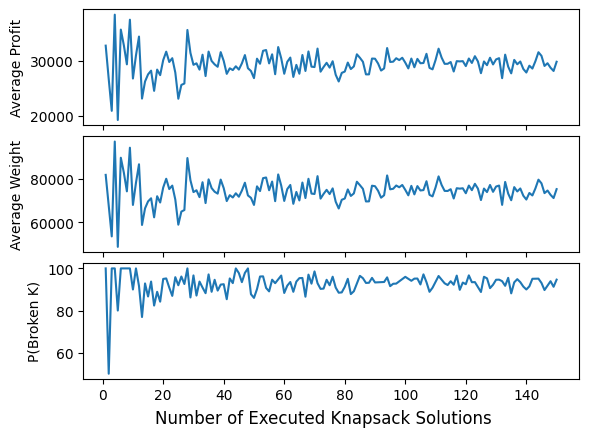

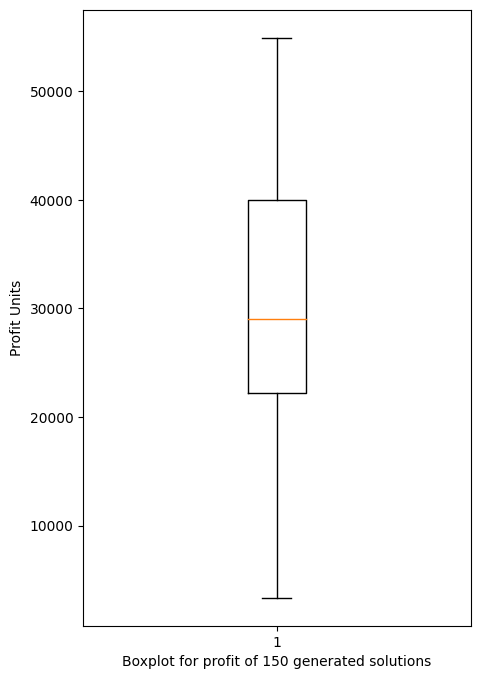

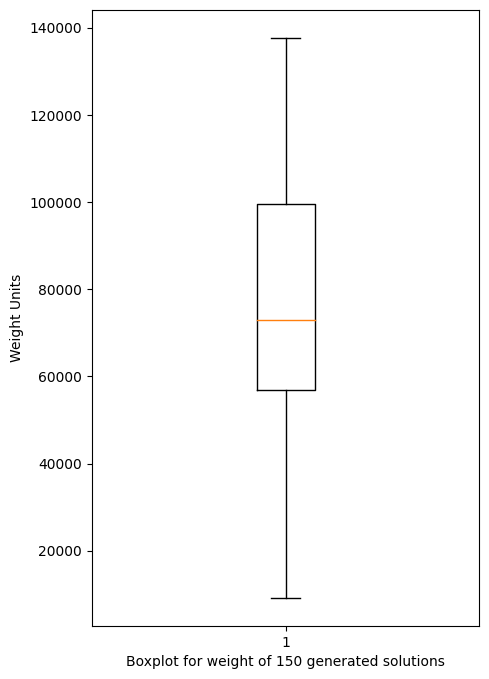

In 150 executed solutions the amount of broken knapsacks 
    is 142
In 150 executed solutions the probability of having a 
    broken knapsack is of 94.66666666666667


In [32]:
results_1, solutions_1, PI_1, k_limit_1 = visualizer(19, 0, 150) # (Number_PI, 
# k_limit), when the knapsack limit is 0, a PI from the library will be selected

### Run #2

The maximum knapsack size is: 100000
Object set from library PI of 40 items


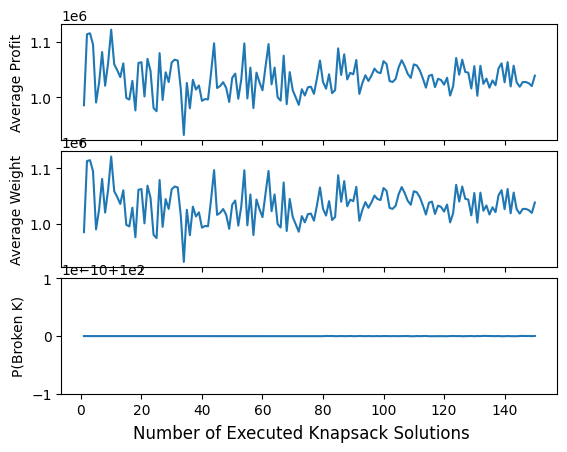

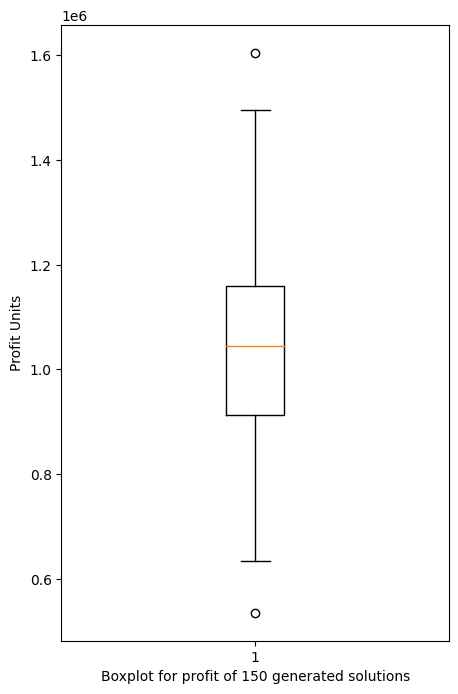

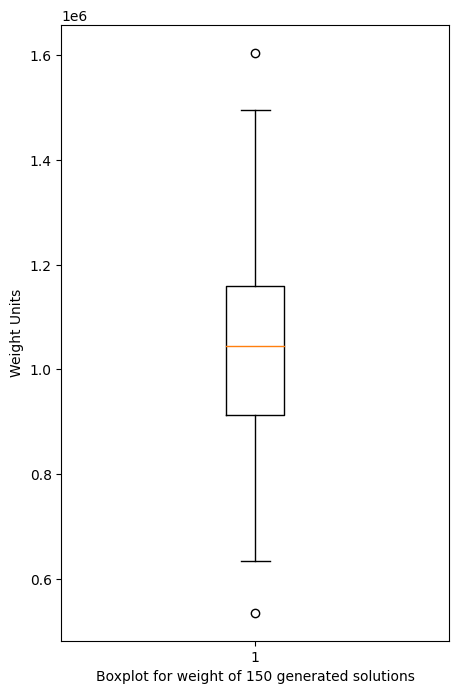

In 150 executed solutions the amount of broken knapsacks 
    is 150
In 150 executed solutions the probability of having a 
    broken knapsack is of 100.0


In [33]:
results_2, solutions_2, PI_2, k_limit_2 = visualizer(40, 0, 150) # (Number_PI, k_limit), when the knapsack limit
# is 0, a PI from the library will be selected

### Run #3

The maximum knapsack size is: 100000
Object set from library PI of 60 items


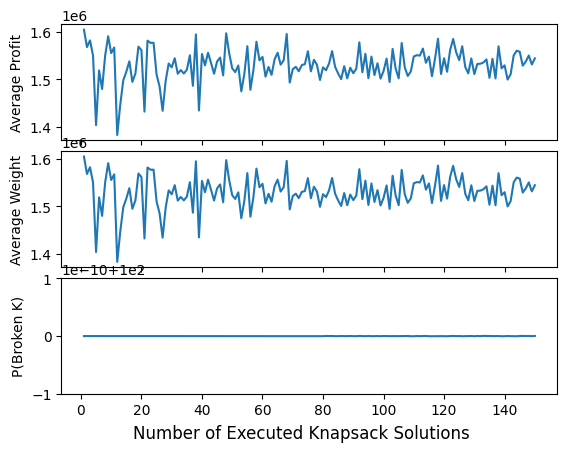

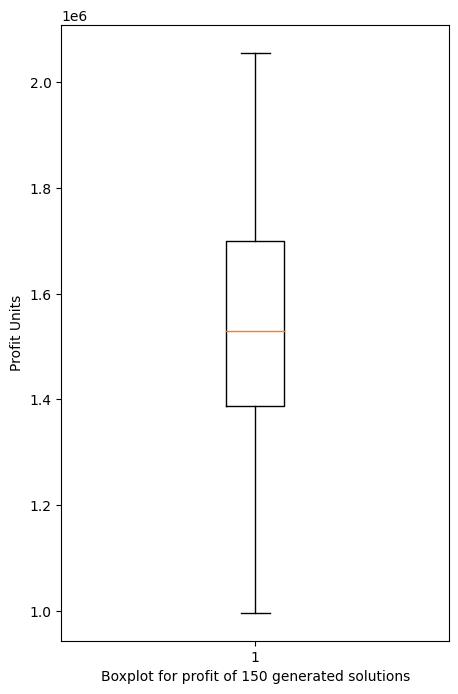

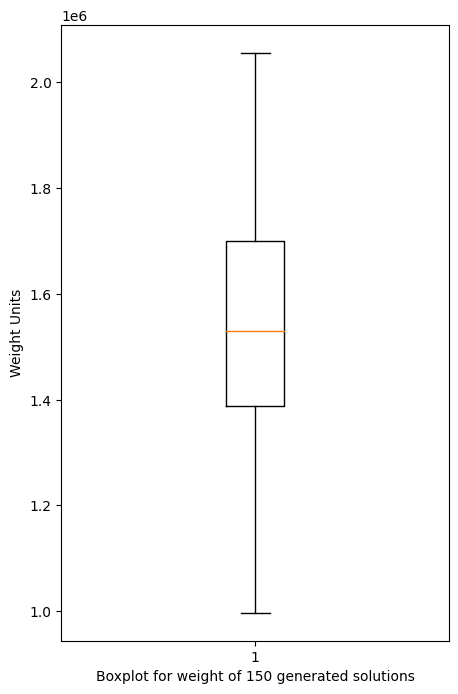

In 150 executed solutions the amount of broken knapsacks 
    is 150
In 150 executed solutions the probability of having a 
    broken knapsack is of 100.0


In [34]:
results_3, solutions_3, PI_3, k_limit_3 = visualizer(60, 0, 150) # (Number_PI, k_limit), when the knapsack limit
# is 0, a PI from the library will be selected